# Cats vs Dogs

The purpose of this is to train a convnet from scratch using a small dataset. The data is from the Kaggle website and was a competition ran around September 2013.

## Extract the images from the file

In [1]:
import os, shutil
import keras

original_dataset_dir = '/Users/datascience4/Downloads/kaggle_cats_and_dogs/train'

#new directory for a smaller dataset than what is packed in kaggle dataset.
base_dir = '/Users/datascience4/Documents/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
## training set for the training validation and test splits
## this will be broken down as:
## training set 1000 samples (images) of each class (2000 total)
## validation set of 500 samples (images) of each class (1000 total)
## test set of 500 samples (images) of each class (1000 total)

try:
    os.mkdir(base_dir)
    #make the train test and validation directories.
    os.mkdir(train_dir)
    os.mkdir(test_dir)
    os.mkdir(validation_dir)
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
    
except FileExistsError:
    print('Process skipped as directories exists.')
    


Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Process skipped as content exists.


In [2]:
#take the files in the folder and put them into train, validation, and test the respective files
## using list comprehensions in a fast way to match the format on the files
## f is short hand new in 3.6 python pep498 formatted string literals

# training cats directory
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dest)

# test cats directory
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

# validation cats directory
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dest)

#training dogs directory
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dest)

#test dogs directory
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)
    
#validation dogs directory
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [3]:
print('total training cat images', len(os.listdir(train_cats_dir)))
print('total test cat images', len(os.listdir(test_cats_dir)))
print('total validation cat images', len(os.listdir(validation_cats_dir)))
print('total training dog images', len(os.listdir(train_dogs_dir)))
print('total test dog images', len(os.listdir(test_dogs_dir)))
print('total validation dog images', len(os.listdir(validation_dogs_dir)))

total training cat images 1000
total test cat images 500
total validation cat images 500
total training dog images 1000
total test dog images 500
total validation dog images 500


# Setting the convnet on a binary classification problem.

Because these images are bigger an the a more complex problem then MNIST digits, an additional Conv2D and Maxpooling will need to be added.

In [4]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
         input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
## from the second layer, input shape is assumed from the first layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
## if this goes into a different environment other than a notebook
## it is typical to import earlier than this.
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [6]:
print(model)
?model.compile

### Data preprocessing
The next thing to do is data preprocessing, since images are currently in jpeg they need to be reformatted into preprocessed floating point tensors before being fed into the network.

* Read the picture file
* Decode the jpeg content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the \[0, 1\] interval (neural networks prefer to deal with small input values.

In [7]:
from keras.preprocessing.image import ImageDataGenerator
# ?ImageDataGenerator

## rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), #Re size all images to 150 x 150
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
keras.__version__
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [9]:
## Fitting the model using a batch generator (because generators are
## iterators, you need to define steps_per_epoch)
## you can also pass in a validation_data argument which can be 
## either a data generator but it could also be a tuple of numpy arrays
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 52s 520ms/step - loss: 0.6905 - acc: 0.5175 - val_loss: 0.6763 - val_acc: 0.6120
Epoch 2/30
100/100 [==============================] - 51s 515ms/step - loss: 0.6564 - acc: 0.6125 - val_loss: 0.6719 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 51s 514ms/step - loss: 0.6133 - acc: 0.6600 - val_loss: 0.6389 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 52s 516ms/step - loss: 0.5649 - acc: 0.7070 - val_loss: 0.5855 - val_acc: 0.6930
Epoch 5/30
100/100 [==============================] - 52s 516ms/step - loss: 0.5341 - acc: 0.7330 - val_loss: 0.6650 - val_acc: 0.6080
Epoch 6/30
100/100 [==============================] - 52s 519ms/step - loss: 0.5139 - acc: 0.7475 - val_loss: 0.5804 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 52s 520ms/step - loss: 0.4910 - acc: 0.7555 - val_loss: 0.5592 - val_acc: 0.7260
Epoch 8/30
100/100 [==============================] - 5

In [10]:
## save the model
model.save('cats_and_dogs_small_1.h5')

## Displaying the curves of loss and accuracy during training

Checking the plots will highlight any indescrepencies, in the above the figures show that accuracy increased in the epochs, however the validation remained predominantly steady. 

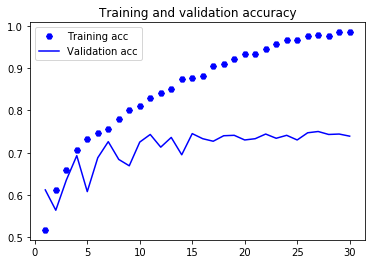

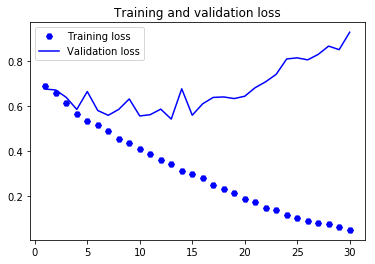

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#adding 1 creates the same shape in the epoch.
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bH', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bH', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model is overfitting at the moment
The above shows that the model is overfitting, which is a common problem with few training samples. Overfitting is the biggest concern. There are ways to mitigate against overfitting.

For computer vision and processing images in particular with deep learning models, you need to mitigate with data augmentation.

### Data Augementation
Data augmentation effectively takes the approach of taking existing training samples and randomly transforming them that yield believable looking images. This means at training the model never sees the exact same picture twice.

This will the model generalise better.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')